PRAKTIKUM 13

In [10]:
# Dataset passengers

#NAMA ICHA NURA NUGRAHA
#KELAS S1-INFORMATIKA BDL 5
#NIM 19.11.2646
import pymongo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
client = pymongo.MongoClient('mongodb://localhost:27017/')
db = client['titanic']
print(db.list_collection_names())


['passengers']


In [2]:
# Membuat dataframe dari collections 
passengers = db.passengers

res = passengers.find()
df_passengers = pd.DataFrame(list(res))

In [3]:
df_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          891 non-null    object
 1   PassengerId  891 non-null    object
 2   Survived     891 non-null    object
 3   Pclass       891 non-null    object
 4   Name         891 non-null    object
 5   Sex          891 non-null    object
 6   Age          714 non-null    object
 7   SibSp        891 non-null    object
 8   Parch        891 non-null    object
 9   Ticket       891 non-null    object
 10  Fare         891 non-null    object
 11  Embarked     889 non-null    object
 12  Cabin        204 non-null    object
dtypes: object(13)
memory usage: 90.6+ KB


In [3]:
df_passengers['PassengerId']=df_passengers['PassengerId'].astype(int)
df_passengers['Survived']=df_passengers['Survived'].astype(int)
df_passengers['Pclass']=df_passengers['Pclass'].astype(int)
df_passengers['Name']=df_passengers['Pclass'].astype('string')
df_passengers['Sex']=df_passengers['Sex'].astype('string')
df_passengers['Age']=df_passengers['Age'].astype(float)
df_passengers['SibSp']=df_passengers['SibSp'].astype(int)
df_passengers['Parch']=df_passengers['Parch'].astype(int)
df_passengers['Ticket']=df_passengers['Ticket'].astype('string')
df_passengers['Fare']=df_passengers['Fare'].astype(float)
df_passengers['Embarked']=df_passengers['Embarked'].astype('string')
df_passengers['Cabin']=df_passengers['Cabin'].astype('string')

In [4]:
df_passengers.isnull().sum()

_id              0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Cabin          687
dtype: int64

In [9]:
#pengisian data kosong
df_passengers = df_passengers.fillna(method='pad')

No. 1

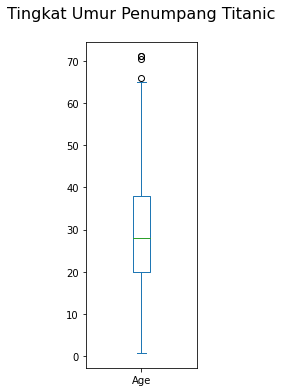

In [6]:
df1_passengers = df_passengers.head(500)
plt.figure(figsize=(2, 6))
df1_passengers['Age'].astype(float).plot(kind='box')
plt.title('Tingkat Umur Penumpang Titanic\n', size=16)
plt.show()

Penjelasan :
Arti dari visualisasi data box plot merupakan jenis data yang divisualisasikan secara statistik dengan cara mendistribusikan data tersebut melalui 5 dimensi yang terdiri dari nilai minimum , kuartil 1 , kuartil 2 , kuartil 3 dan nilai maximum , Data diatas menunjukan tingkat umur penumpang titanic memiliki rentang umur 20 hingga 40

No. 2

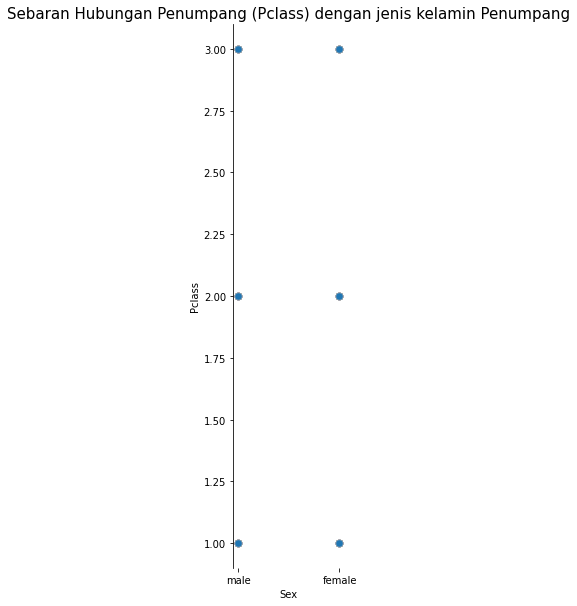

In [7]:
f, ax1 = plt.subplots(1, figsize=(2, 10), sharex=False) 
sns.scatterplot(x=df_passengers["Sex"], y=df_passengers['Pclass'], #fungsi dependent sebagai sebab akibat menggunakan Sumbu X DAN Y 
            alpha=.2, hue_norm=(-2, 2), edgecolor=".7", palette="muted",
            size_norm=(-.2, .8), data=df_passengers, ax=ax1, s=50) 
 
ax1.set_ylabel("Pclass") # Sumbu Y
ax1.set_title('Sebaran Hubungan Penumpang (Pclass) dengan jenis kelamin Penumpang', size=15) #Mengubah judul diagram serta menentukan ukuran judul diagram
sns.despine(bottom=True)

No. 3


Diagram diatas menunjukan hubungan antara kelas penumpang tidak dapat di bedakan antara jenis kelamin , hal tersebut terlihat bahwa penumpang baik laki dan perempuan sama sama penempati dikelas penumpang yang sama

No. 4

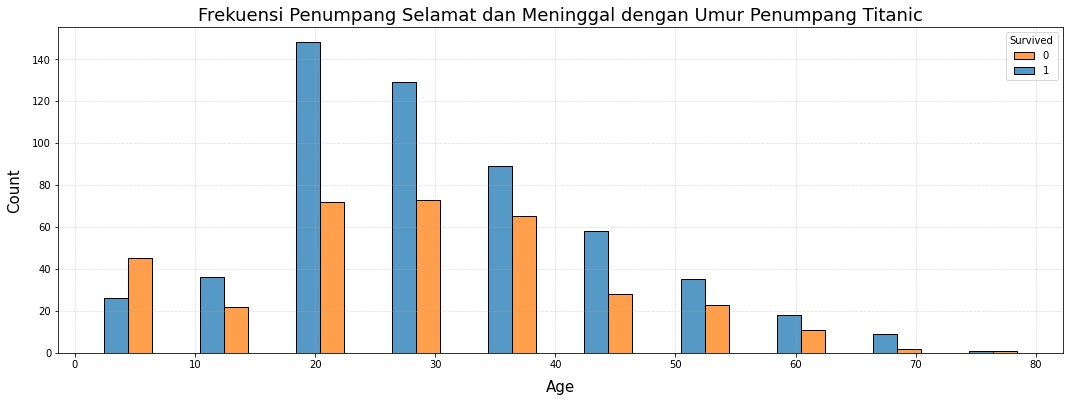

In [8]:
f, ax = plt.subplots(1, figsize = (18, 6), sharex = False)
sns.histplot( x=df_passengers['Age'], hue = df_passengers['Survived'], multiple = "dodge", binwidth = 8, shrink = .5)

plt.xlabel('Age', size=15, labelpad=10)
plt.ylabel('Count', size=15, labelpad=10)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

plt.legend(df_passengers['Survived'], loc='upper right', prop={'size': 10}, title = "Survived") 
ax.set_title('Frekuensi Penumpang Selamat dan Meninggal dengan Umur Penumpang Titanic', size=18)
plt.show()

No.5

Kesimpulan dapat dilihat pada grafik Penumpang dengan interval 15th sampai 30th lebih banyak yang selamat dari pada yang meninggal dibandingkan dengan penumpang yang berumur 30th ke atas dan 15th ke bawah

Kesimpulan

Jenis kelamin tidak dapat digunakan untuk merepresentasi suatu Kelas Penumpang baik itu laki-laki atau perempuan dapat menempati semua kelas penumpang yang disediakan gender juga tidak mendominasi dalam suatu kelas tertentu. Sedangkan umur penumpang sendiri dapat dikatakan bahwa Penumpang pada dataset Titanic didominasi oleh orang dengan umur 20th hingga 40th .Penumpang pada dataset titanic juga dapat kita lihat bahwa Penumpang umur 15th sampai dengan 30th lebih banyak yang selamat dibandingkan yang meninggal.